In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from matplotlib import animation
import scienceplots
plt.style.use(['science','ieee'])

In [2]:
N=100

In [3]:
init_random=np.random.random((N,N))
lattice_Ne=np.ones((N,N))

In [4]:
lattice_Ne[init_random<=0.75]=-1


In [5]:
@numba.njit("(f8[:,:], i8, f8)", nogil=True)
def metropolis(spin_arr, times, T):
    spin_arr = spin_arr.copy()
    
    for t in range(0, times-1):
        x = np.random.randint(0, N)
        y = np.random.randint(0, N)
        spin_i = spin_arr[x, y] 
        spin_f = spin_i * -1
        E_i = -spin_i * (spin_arr[(x-1) % N, y] + spin_arr[(x+1) % N, y] + spin_arr[x, (y-1) % N] + spin_arr[x, (y+1) % N])
        E_f = -E_i
        dE = E_f - E_i
        if (dE > 0) * (np.random.random() < np.exp(-1/T * dE)):
            spin_arr[x, y] = spin_f
        elif dE <= 0:
            spin_arr[x, y] = spin_f
            
    return spin_arr


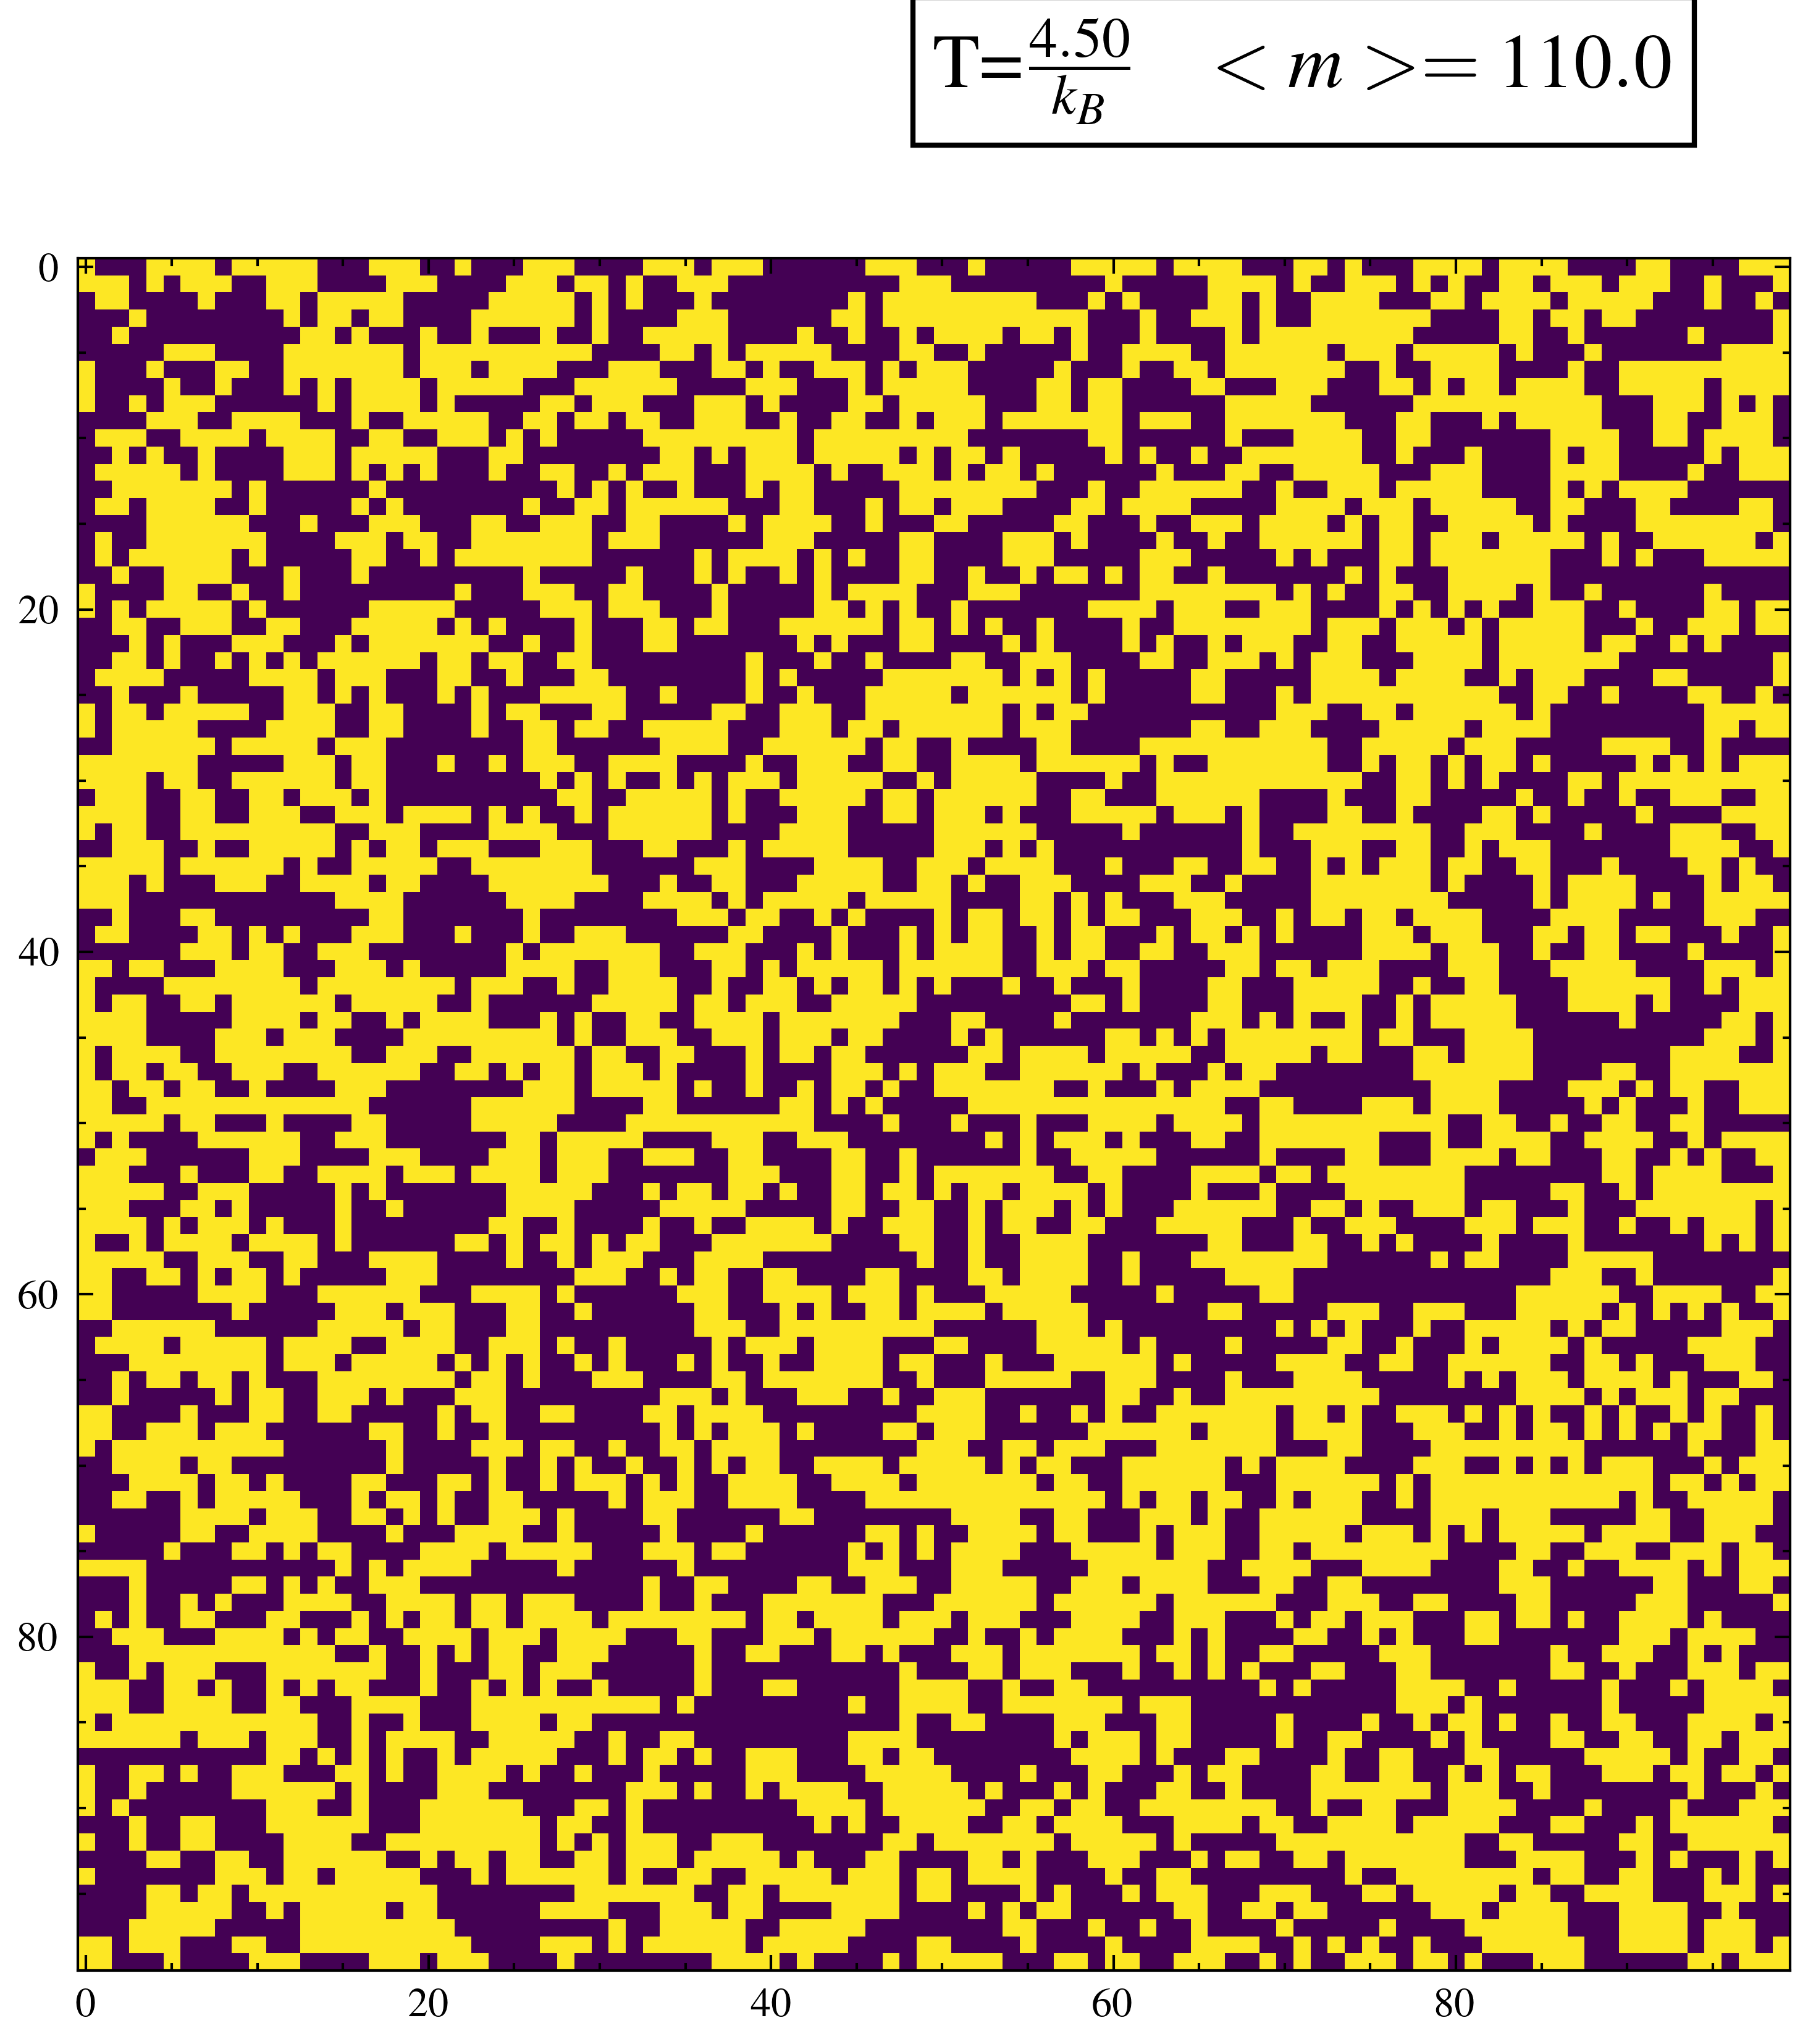

In [6]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ln1 = plt.imshow(lattice_Ne, cmap='viridis', animated=True)
time_text = ax.text(0.5, 1.1, '', fontsize=15, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

Ti=0.6
Tf=4.5
Nombre_iters=100
m=(Tf-Ti)/(Nombre_iters-1)
b=Ti-m
def i_to_T(pas):
    return m*pas+b

def update(i):
    global lattice_Ne
    lattice_Ne = metropolis(lattice_Ne, 1E7, i_to_T(i+1))
    m_hat=lattice_Ne.sum()
    ln1.set_array(lattice_Ne)
    time_text.set_text(r'T=$\frac{{{:.2f}}}{{k_B}} \ \ \ <m>={}$'.format(i_to_T(i+1),m_hat))
    return ln1, time_text

ani = animation.FuncAnimation(fig, update, frames=range(Nombre_iters), interval=100, blit=True)
ani.save('Estat_final_vs_T.gif', writer='pillow', fps=1.5, dpi=100)

plt.show()
